# Happiness Project

<strong>Description</strong>
<p>The World Happiness Report is a landmark survey of the state of global happiness.Happiness score is based on the following six factors-Economy(GDP), Family, Life expectency, Govt. Corruption, Generocity, Freedom contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors -.The happiness score lies between 0-10. This model tries to predict the happiness score using the above mentioned factors. </p>
<p>
    Algorithm used - Linear regression<br>
    Dataset - https://raw.githubusercontent.com/sandespalakat/Datascience/main/Happiness-Project/data/happiness.csv
</p>


In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data
happiness = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Happiness-Project/data/happiness.csv")

In [4]:
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
#create dataframe with the data
happiness = pd.DataFrame(data=happiness)

In [6]:
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
#drop country, region, rank because it won't affect the deoendant variable
happiness.drop(["Country", "Region", "Happiness Rank"], axis=1, inplace=True)

In [8]:
happiness

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
happiness.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


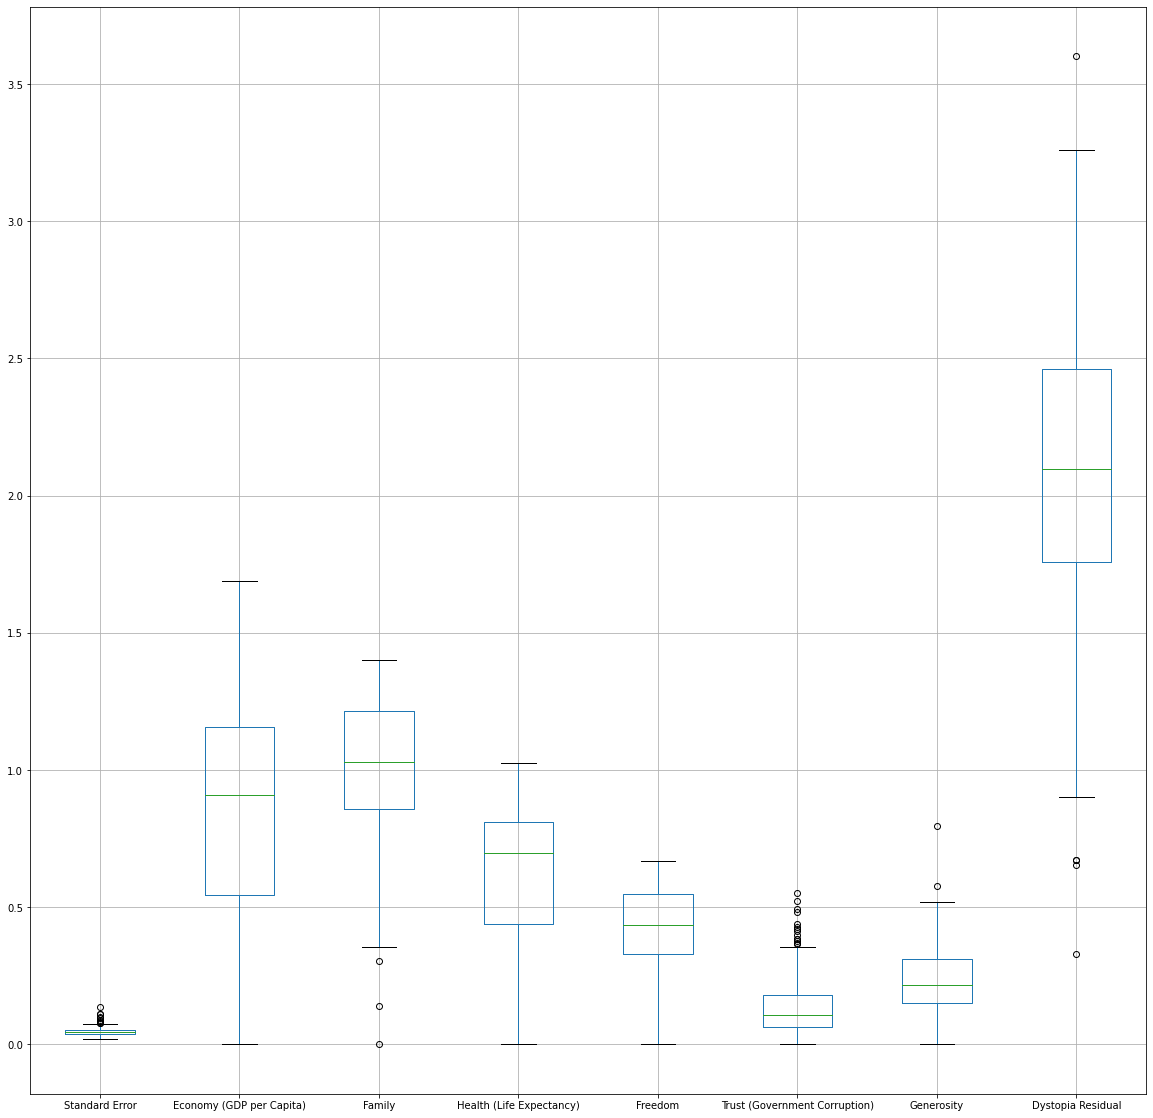

In [10]:
#EDA
happiness.iloc[:,1:].boxplot(figsize=(20,20))

In [11]:
#There are outliers in standard error, family,trust,generosity,dystopial residual columns

In [12]:
happiness_corr = happiness.corr()

In [13]:
happiness_corr

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


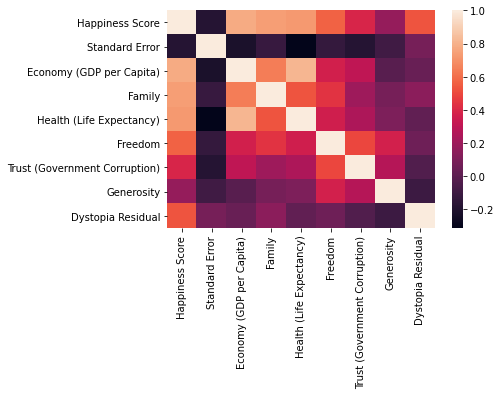

In [14]:
sns.heatmap(happiness_corr)

In [15]:
# no colmns to drop

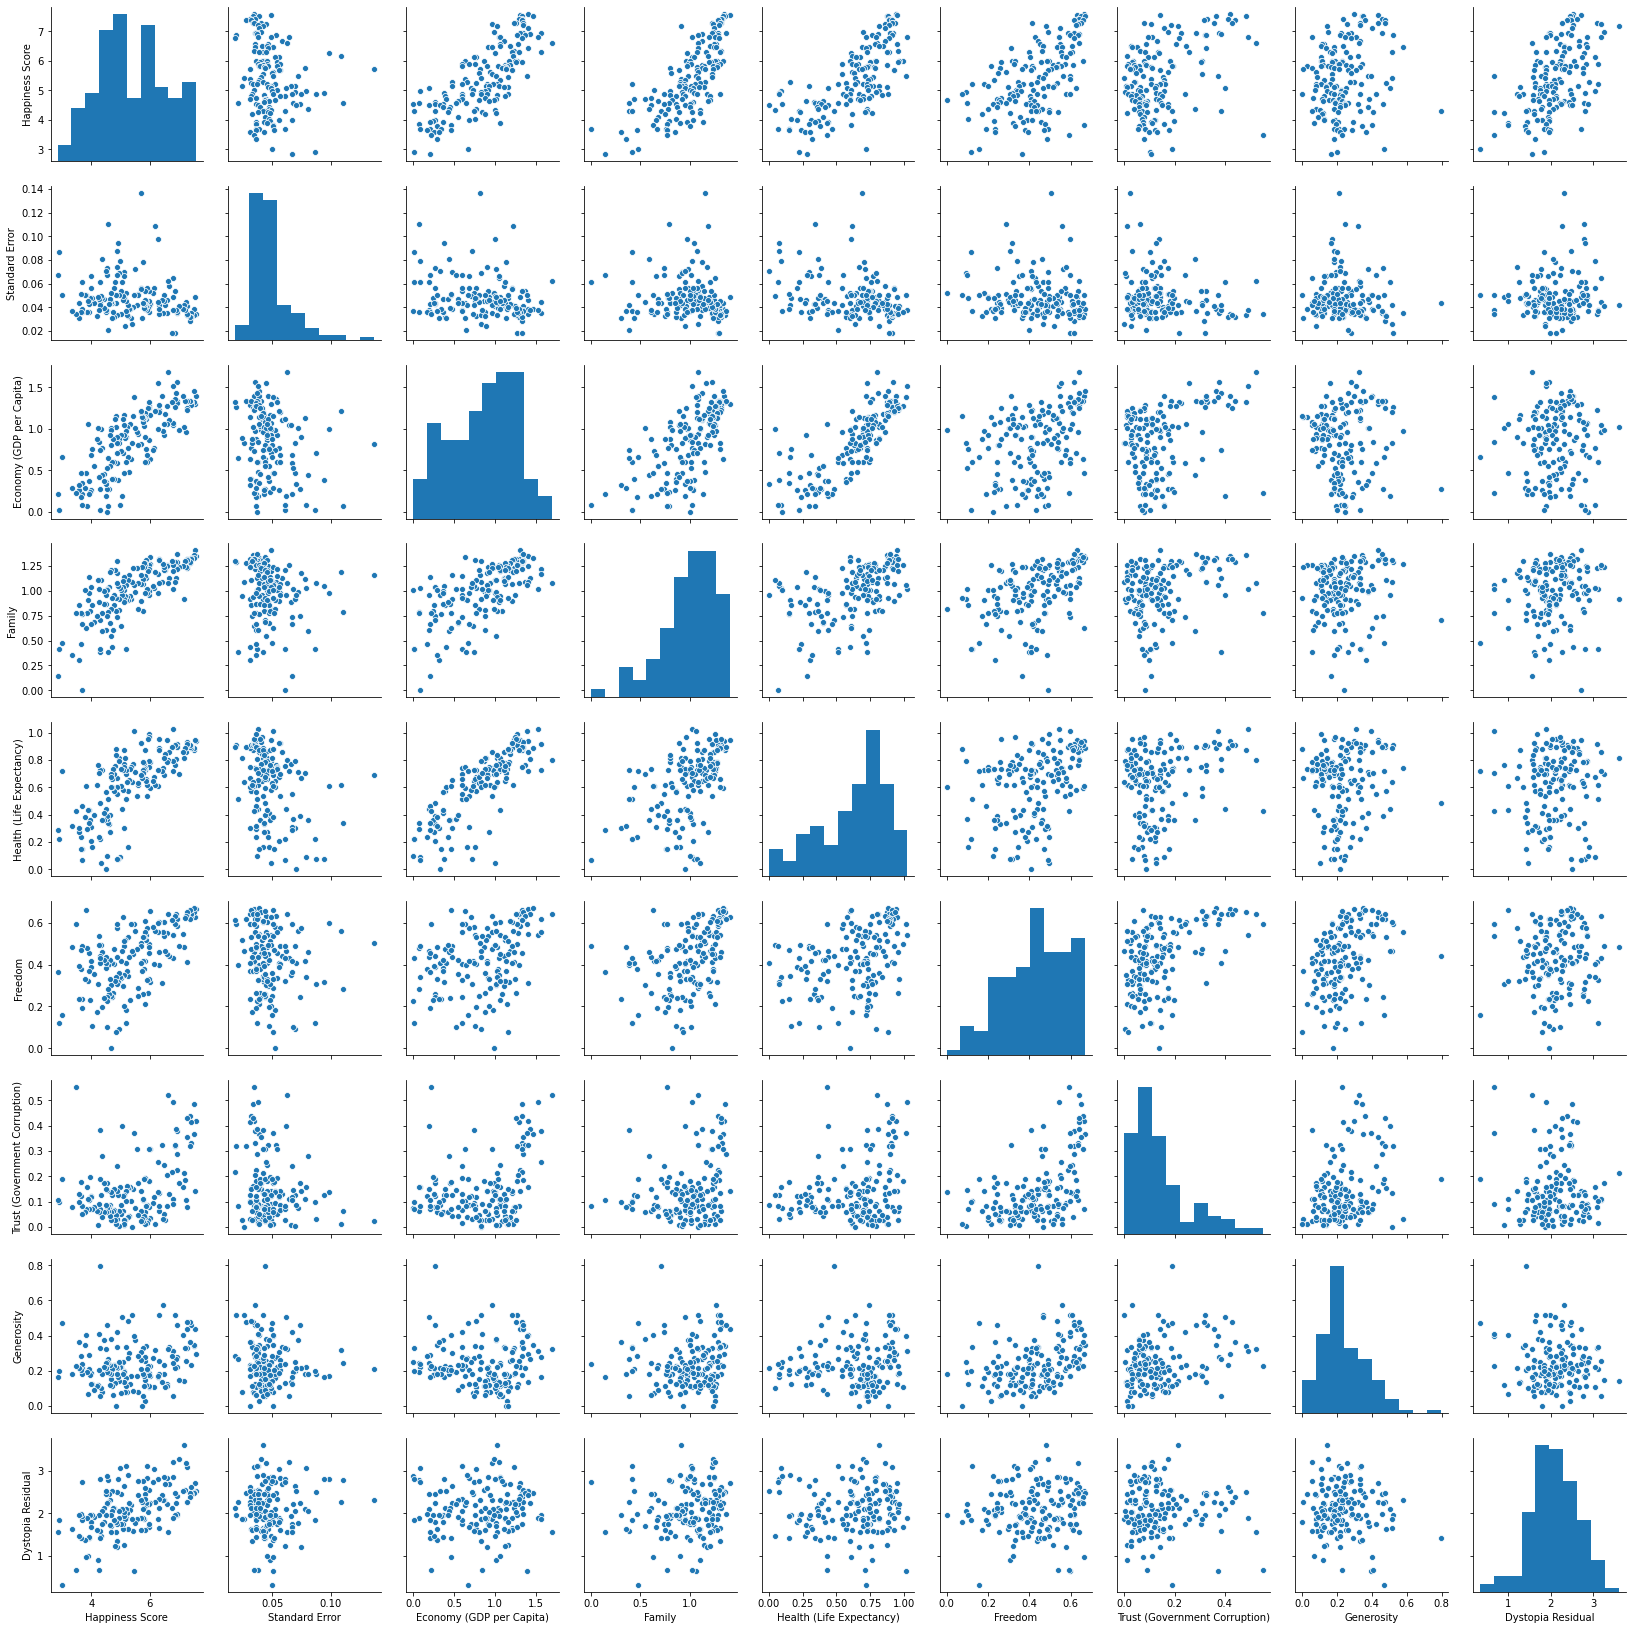

In [16]:
sns.pairplot(happiness)

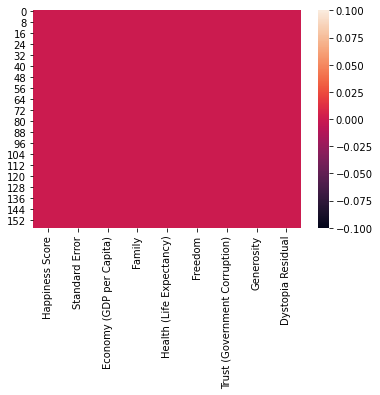

In [17]:
#check if there is any empty values in the dataset
sns.heatmap(happiness.isnull())

In [18]:
#No empty vallues are present in the dataset

In [19]:
from scipy.stats import zscore

In [20]:
happiness_z = np.abs(zscore(happiness))

In [21]:
happiness_z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [22]:
new_happiness = happiness[(happiness_z < 3).all(axis=1)]

In [23]:
happiness.shape

(158, 9)

In [24]:
new_happiness.shape

(149, 9)

In [25]:
new_happiness

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [26]:
new_happiness.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


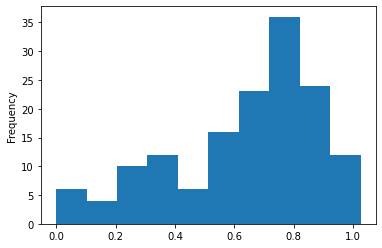

In [27]:
new_happiness.iloc[:,4].plot.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C21D46B370>,
      dtype=object)

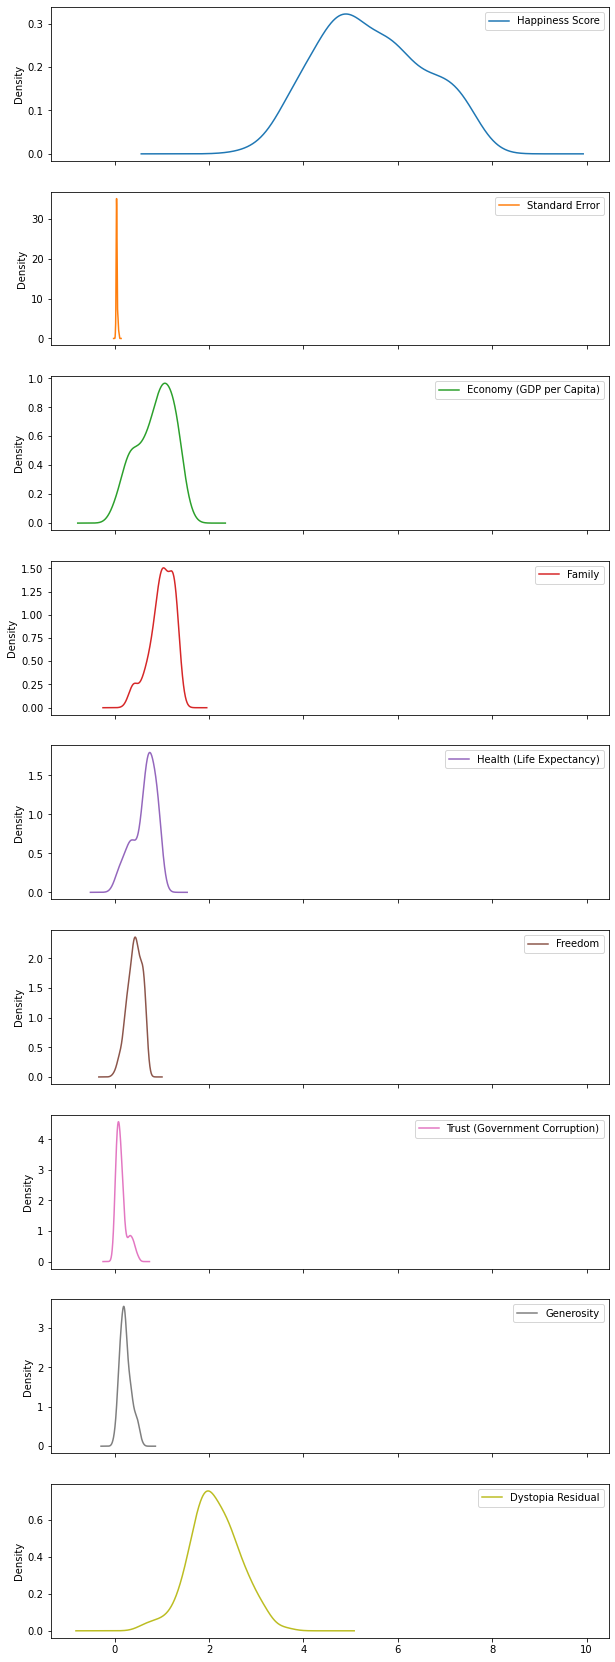

In [28]:
new_happiness.plot(kind="density", subplots=True, figsize=(10,30))

In [29]:
new_happiness

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [30]:
x = new_happiness.iloc[:,1:]

In [31]:
y = new_happiness.iloc[:,0]

In [32]:
y = np.array(y)

In [33]:
y.shape

(149,)

In [34]:
y.reshape(-1, 1)

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [5.754],
       [5.716],
       [

In [37]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 8


In [38]:
#Best random state is 8
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = .33, random_state = 8)

In [39]:
x_test.shape

(50, 8)

In [40]:
x_train.shape

(99, 8)

In [41]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [42]:
predict = lm.predict(x_test)

In [43]:
predict

array([7.42687115, 6.50502927, 6.57499335, 5.58866097, 4.88443596,
       6.32885959, 6.79773843, 3.65506584, 4.03308244, 5.21193164,
       4.25197766, 6.485079  , 3.78080599, 5.87827729, 4.51229176,
       3.9307802 , 3.58686317, 4.29251612, 5.42851447, 4.83917069,
       5.84754927, 7.56083256, 2.90465173, 5.0130633 , 4.87418756,
       7.58687728, 3.65593654, 7.52214668, 6.94018481, 4.55065508,
       5.9837143 , 7.19977093, 6.81023816, 4.34997661, 5.39865966,
       5.25278205, 4.68555153, 5.05731752, 6.41119708, 4.86723349,
       4.507257  , 6.00271434, 5.19384781, 5.77035697, 4.60975333,
       5.88901828, 5.98699165, 6.1227538 , 5.00700911, 3.68089696])

In [44]:
y_test

array([7.427, 6.505, 6.575, 5.589, 4.885, 6.329, 6.798, 3.655, 4.033,
       5.212, 4.252, 6.485, 3.781, 5.878, 4.512, 3.931, 3.587, 4.292,
       5.429, 4.839, 5.848, 7.561, 2.905, 5.013, 4.874, 7.587, 3.656,
       7.522, 6.94 , 4.55 , 5.984, 7.2  , 6.81 , 4.35 , 5.399, 5.253,
       4.686, 5.057, 6.411, 4.867, 4.507, 6.003, 5.194, 5.77 , 4.61 ,
       5.889, 5.987, 6.123, 5.007, 3.681])

In [45]:
print(r2_score(y_test, predict))

0.9999999506659051


In [47]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [50]:
cv = cross_val_score(lm, x, y, cv=7)

In [51]:
cv.mean()

0.9999952492730105

In [52]:
#accuracy is almost same with and without cross validation

In [53]:
#saving model
import joblib

In [54]:
joblib.dump(lm,"Happiness.pkl")

['Happiness.pkl']